In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'kddcup.csv'
df = pd.read_csv(file_path, header=None)

In [2]:
#replace nan values with median
for col in df.columns:
    if df[col].dtype == np.number:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\shane\AppData\Local\Temp\ipykernel_13196\1219944723.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:


In [3]:
#drop duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows to be dropped: {num_duplicates}")
df = df.drop_duplicates()

Number of duplicate rows to be dropped: 3823439


In [4]:
print(df.head())

   0    1     2   3    4      5   6   7   8   9   ...  32   33   34    35  \
0   0  tcp  http  SF  215  45076   0   0   0   0  ...   0  0.0  0.0  0.00   
1   0  tcp  http  SF  162   4528   0   0   0   0  ...   1  1.0  0.0  1.00   
2   0  tcp  http  SF  236   1228   0   0   0   0  ...   2  1.0  0.0  0.50   
3   0  tcp  http  SF  233   2032   0   0   0   0  ...   3  1.0  0.0  0.33   
4   0  tcp  http  SF  239    486   0   0   0   0  ...   4  1.0  0.0  0.25   

    36   37   38   39   40       41  
0  0.0  0.0  0.0  0.0  0.0  normal.  
1  0.0  0.0  0.0  0.0  0.0  normal.  
2  0.0  0.0  0.0  0.0  0.0  normal.  
3  0.0  0.0  0.0  0.0  0.0  normal.  
4  0.0  0.0  0.0  0.0  0.0  normal.  

[5 rows x 42 columns]


In [5]:
#find columns without variation
zero_std_columns = [col for col in df.columns if df[col].dtype != object and df[col].std() == 0]
if len(zero_std_columns) > 0:
    print("Columns without variation:", ', '.join(map(str, zero_std_columns)))
else:
    print("There are no columns without variation.")

Columns without variation: 19


In [6]:
columns_to_drop = df.columns[zero_std_columns].tolist()

df = df.drop(columns=columns_to_drop)

In [7]:
print("Class counts:")
print(df.iloc[:, -1].value_counts())

Class counts:
normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: 41, dtype: int64


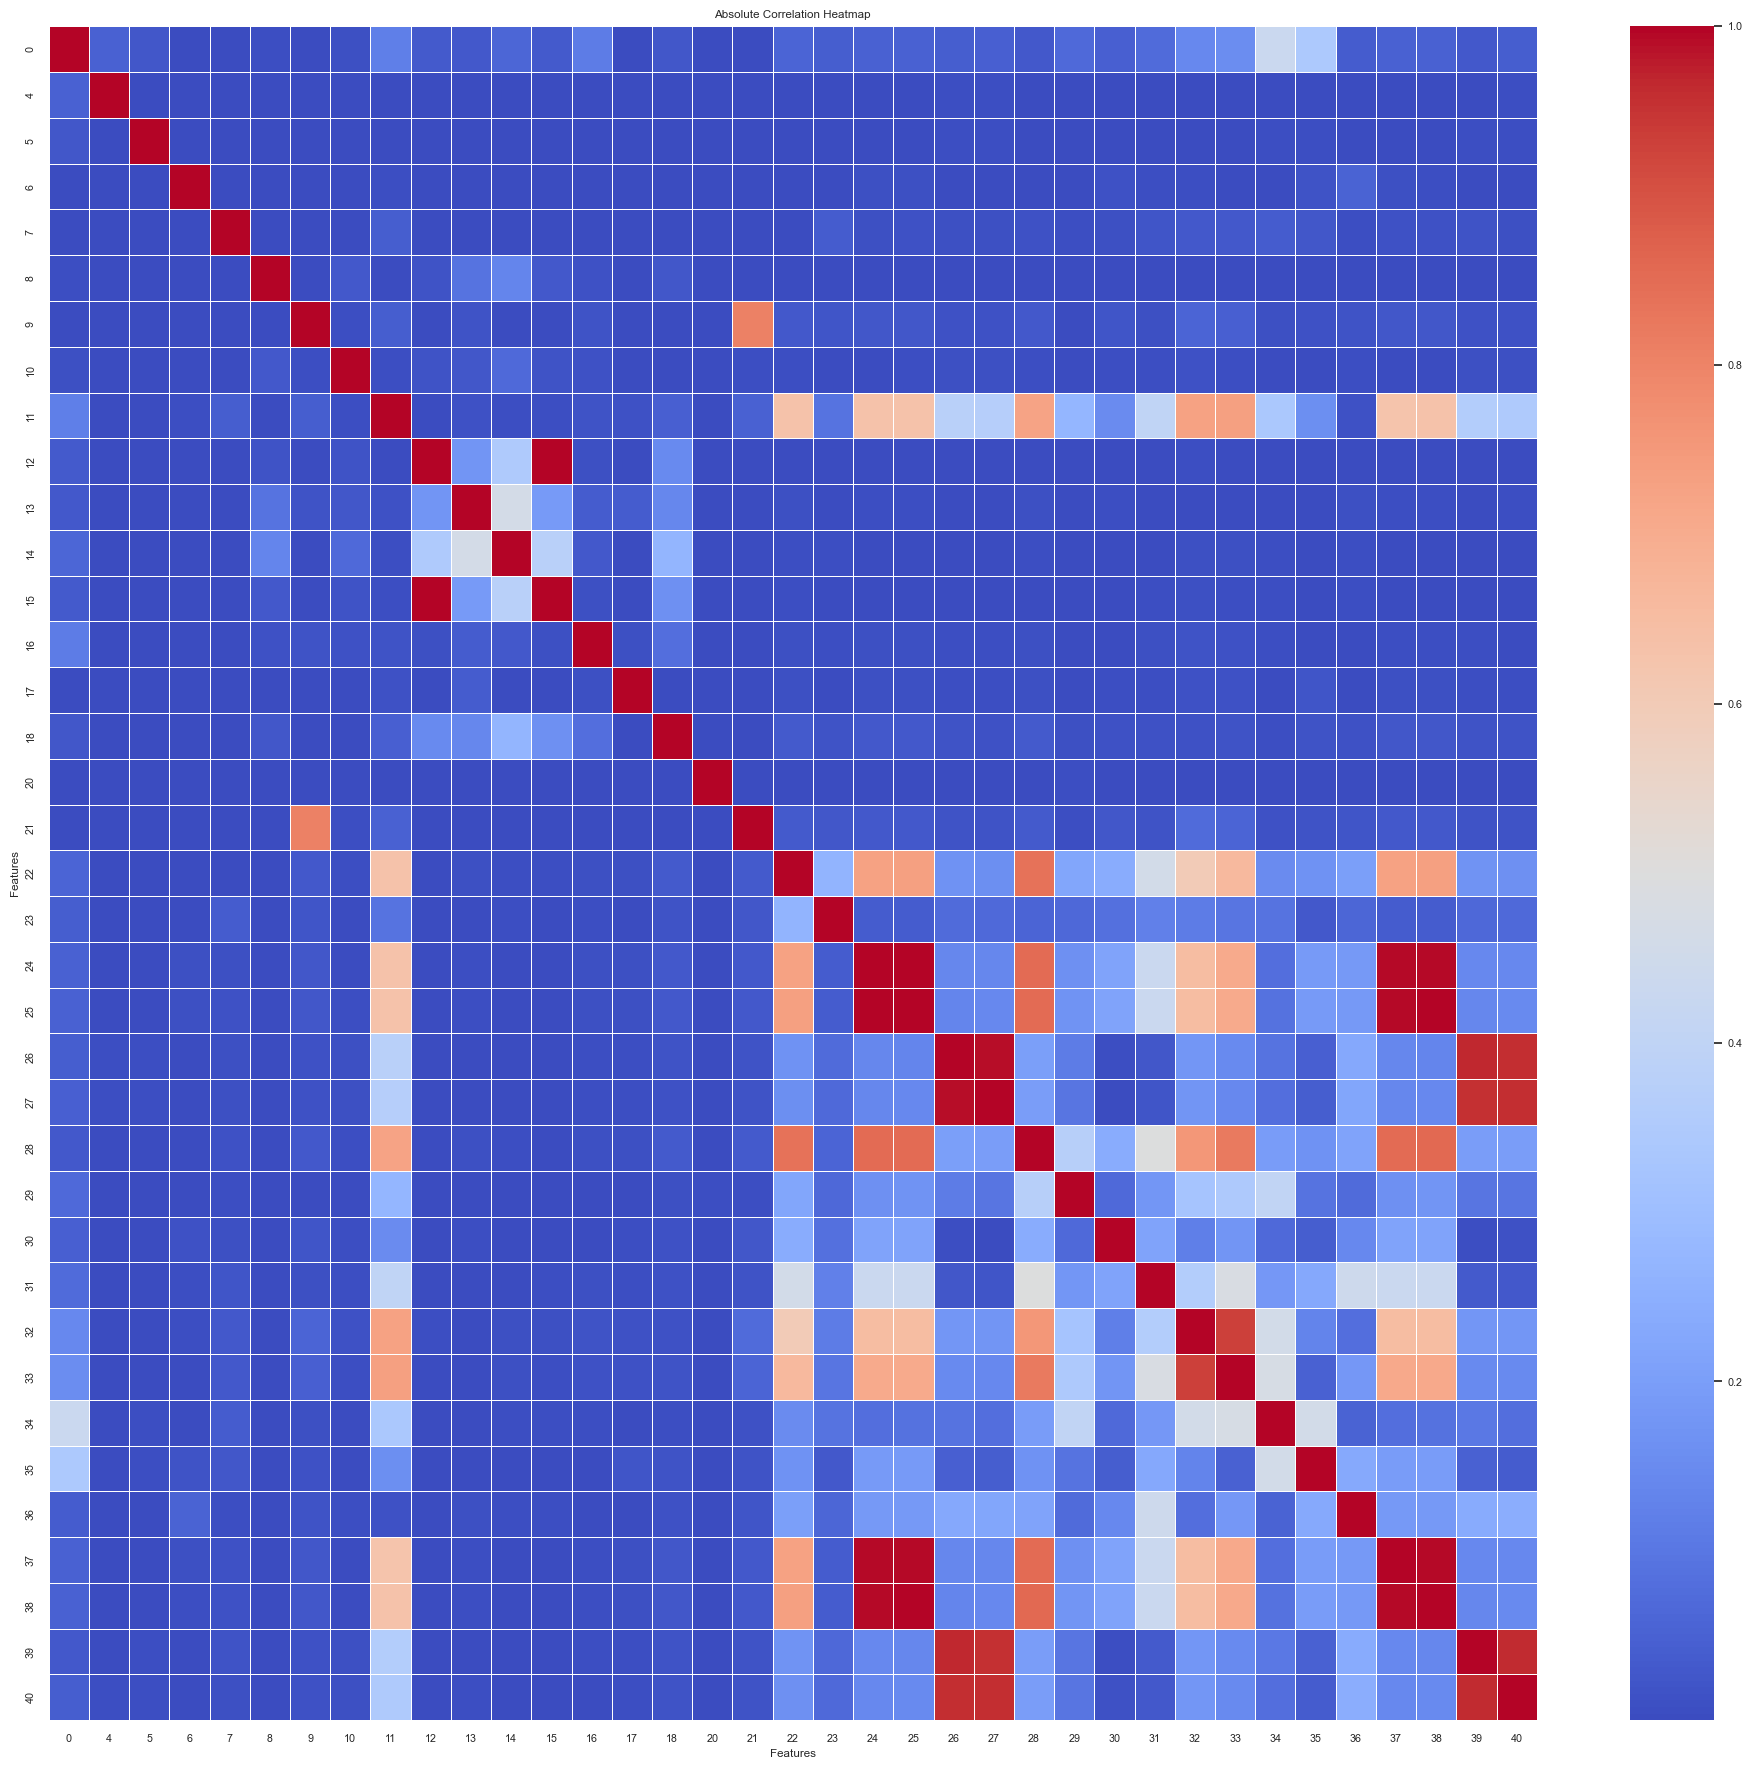

In [8]:
import seaborn as sns
import numpy as np

corr_matrix_abs = np.abs(df.corr())
plt.figure(figsize=(24, 22))
sns.set(font_scale=0.7)
sns.heatmap(corr_matrix_abs, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Absolute Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.savefig("absolute_correlation_heatmap2.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
#print features with high correlation
high_corr = corr_matrix_abs[(corr_matrix_abs > 0.9) & (corr_matrix_abs < 1.0)]

print("Feature pairs with absolute correlation above 0.9:\n")
for i in high_corr.index:
    for j in high_corr.columns:
        if not np.isnan(high_corr.at[i, j]):
            print(f"{i} - {j}: {high_corr.at[i, j]}")

Feature pairs with absolute correlation above 0.9:

12 - 15: 0.9976014772642953
15 - 12: 0.9976014772642953
24 - 25: 0.9968292941304362
24 - 37: 0.9958000759756368
24 - 38: 0.9949383114241376
25 - 24: 0.9968292941304362
25 - 37: 0.9936509991771271
25 - 38: 0.9973893241242227
26 - 27: 0.9895908865802381
26 - 39: 0.965840027856236
26 - 40: 0.958523973063513
27 - 26: 0.9895908865802381
27 - 39: 0.9564016619985697
27 - 40: 0.9595431361554362
32 - 33: 0.9317944399358417
33 - 32: 0.9317944399358417
37 - 24: 0.9958000759756368
37 - 25: 0.9936509991771271
37 - 38: 0.9951320143782871
38 - 24: 0.9949383114241376
38 - 25: 0.9973893241242227
38 - 37: 0.9951320143782871
39 - 26: 0.965840027856236
39 - 27: 0.9564016619985697
39 - 40: 0.9612464611427293
40 - 26: 0.958523973063513
40 - 27: 0.9595431361554362
40 - 39: 0.9612464611427293


In [10]:
string_cols = df.select_dtypes(include=['object'])

print("Columns with string values:")
for col in string_cols.columns:
    print(f"Column Name: {col}")

Columns with string values:
Column Name: 1
Column Name: 2
Column Name: 3
Column Name: 41


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, make_scorer

X = df.drop(columns=[41])
y = df[41]

X_encoded = pd.get_dummies(X, columns=[1, 2, 3])

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=100, class_weight='balanced')

f1_scorer = make_scorer(f1_score, average='weighted')

accuracy_scores = cross_val_score(clf, X_train_scaled, y_train_encoded, cv=5)
f1_scores = cross_val_score(clf, X_train_scaled, y_train_encoded, cv=5, scoring=f1_scorer)

print("Accuracy scores:", accuracy_scores)
print("Mean accuracy score:", np.mean(accuracy_scores))
print("F1 scores:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))

clf.fit(X_train_scaled, y_train_encoded)

y_pred_encoded = clf.predict(X_test_scaled)
y_pred = encoder.inverse_transform(y_pred_encoded)

report = classification_report(y_test_encoded, y_pred_encoded, output_dict=True)

class_names = encoder.classes_

for encoded_label, metrics in report.items():
    if encoded_label not in ["accuracy", "macro avg", "weighted avg"]:
        class_name = class_names[int(encoded_label)]
        print(f"{class_name}:")
        print(f"  Precision: {metrics['precision']}")
        print(f"  Recall: {metrics['recall']}")
        print(f"  F1-score: {metrics['f1-score']}")

C:\Users\shane\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\shane\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\shane\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\shane\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\shane\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:

Accuracy scores: [0.99978488 0.99974418 0.99972674 0.99973256 0.99973837]
Mean accuracy score: 0.9997453467414624
F1 scores: [0.99976321 0.9997119  0.99970144 0.99971687 0.99971656]
Mean F1 score: 0.9997219947163932
back.:
  Precision: 1.0
  Recall: 1.0
  F1-score: 1.0
buffer_overflow.:
  Precision: 1.0
  Recall: 0.5454545454545454
  F1-score: 0.7058823529411764
ftp_write.:
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0
guess_passwd.:
  Precision: 1.0
  Recall: 0.75
  F1-score: 0.8571428571428571
imap.:
  Precision: 1.0
  Recall: 0.3333333333333333
  F1-score: 0.5
ipsweep.:
  Precision: 0.9934123847167325
  Recall: 0.9960369881109643
  F1-score: 0.9947229551451188
land.:
  Precision: 0.6666666666666666
  Recall: 0.5714285714285714
  F1-score: 0.6153846153846153
multihop.:
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0
neptune.:
  Precision: 1.0
  Recall: 1.0
  F1-score: 1.0
nmap.:
  Precision: 0.9928057553956835
  Recall: 0.971830985915493
  F1-score: 0.9822064056939502
normal.:
  Prec

C:\Users\shane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
